# Data import and preparation

In [96]:
import pandas as pd
data = pd.read_csv("tweets.csv")
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [97]:
# Drop null values
data = data.dropna()
data.shape

(27480, 4)

In [98]:
# Dropping features which are not useful
x = data.drop(["sentiment", "selected_text", "textID"], axis = 1)

In [99]:
# Converting string into numerical values
y = data["sentiment"].replace(["neutral", "negative", "positive"], [0,1,2])
pd.concat([data["sentiment"], y], axis = 1)

,sentiment,sentiment
0,neutral,0
1,negative,1
2,negative,1
3,negative,1
4,negative,1
...,...,...
27476,negative,1
27477,negative,1
27478,positive,2
27479,positive,2


<AxesSubplot:xlabel='sentiment', ylabel='count'>

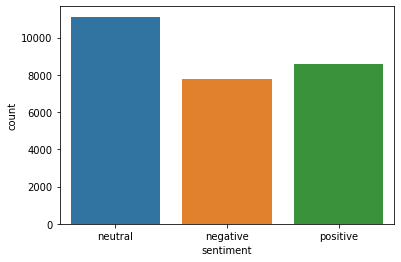

In [100]:
import seaborn as sns
sns.countplot(data = data, x  = "sentiment")

In [101]:
x.shape, y.shape

((27480, 1), (27480,))

# Data Preprocessing

In [102]:
messages = x.copy()
messages.reset_index(inplace= True)
messages.shape

(27480, 2)

In [103]:
import nltk   # Natural Languange Tool Kit
import re     # Regural expression
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [105]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

corpus = []

for i in range(0,len(messages)):
    review = re.sub("[^a-zA-Z]", " ", messages["text"][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)
    
corpus

['respond go',
 'sooo sad miss san diego',
 'boss bulli',
 'interview leav alon',
 'son put releas alreadi bought',
 'http www dothebounci com smf shameless plug best ranger forum earth',
 'feed babi fun smile coo',
 'soooo high',
 '',
 'journey wow u becam cooler hehe possibl',
 'much love hope reckon chanc minim p never gonna get cake stuff',
 'realli realli like song love stori taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voic',
 'test test lg env',
 'uh oh sunburn',
 'ok tri plot altern speak sigh',
 'sick past day thu hair look wierd didnt hat would look http tinyurl com mnf kw',
 'back home gonna miss everi one',
 'he',
 'oh marli sorri hope find soon',
 'play ghost onlin realli interest new updat kirin pet metamorph third job wait dragon pet',
 'clean hous famili com later today',
 'gotta restart comput thought win suppos put end constant rebooti',
 'see wat mean bout foll w friiday call lose f llower friday smh',
 'free fillin app ipod fun im addict

# One Hot Representation

In [106]:
from keras.preprocessing.text import one_hot
vocab_size = 10000
one_hot_rep = [one_hot(words, vocab_size) for words in data["text"]]
one_hot_rep[0]

[7856, 9478, 2427, 8929, 7183, 7856, 9710, 6619]

# Padding

In [107]:
# Finding Max_length for padding
max_counter = 0 
for i, sentence in enumerate(one_hot_rep):
    
    if max_counter < len(sentence):
        max_counter = len(sentence)
        max_index = i
        
max_counter, max_index

(35, 16706)

In [108]:
from keras.preprocessing.sequence import pad_sequences
max_sentence_length = max_counter  # from the above function
one_hot_padded = pad_sequences(one_hot_rep, maxlen = max_sentence_length, padding = "post")
one_hot_padded

array([[7856, 9478, 2427, ...,    0,    0,    0],
       [6407,  905, 7856, ...,    0,    0,    0],
       [1324, 4692, 7005, ...,    0,    0,    0],
       ...,
       [9456, 9509, 9907, ...,    0,    0,    0],
       [6592, 8120, 7017, ...,    0,    0,    0],
       [3175, 4737, 7444, ...,    0,    0,    0]])

# Model Creation

In [113]:
from keras import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM

features = 100

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = features, input_length = max_sentence_length))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(3, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 35, 100)           1000000   
                                                                 
 dropout_14 (Dropout)        (None, 35, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,080,703
Trainable params: 1,080,703
Non-trainable params: 0
_________________________________________________________________


# Data finalization

In [114]:
import numpy as np
x = np.array(one_hot_padded)
y = np.array(y)
x.shape, y.shape

((27480, 35), (27480,))

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = True)
x_train.shape, y_train.shape

((21984, 35), (21984,))

# Model Training

In [116]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
619/619 [==============================] - 29s 44ms/step - loss: 0.9785 - accuracy: 0.5014 - val_loss: 0.7797 - val_accuracy: 0.6598
Epoch 2/5
619/619 [==============================] - 25s 41ms/step - loss: 0.7064 - accuracy: 0.7064 - val_loss: 0.7218 - val_accuracy: 0.6853
Epoch 3/5
619/619 [==============================] - 24s 39ms/step - loss: 0.5831 - accuracy: 0.7655 - val_loss: 0.7266 - val_accuracy: 0.6876
Epoch 4/5
619/619 [==============================] - 21s 33ms/step - loss: 0.4903 - accuracy: 0.8094 - val_loss: 0.7970 - val_accuracy: 0.6899
Epoch 5/5
619/619 [==============================] - 20s 33ms/step - loss: 0.4146 - accuracy: 0.8441 - val_loss: 0.9822 - val_accuracy: 0.6462


In [ ]:
# MOdel prediction
metrics = model.evaluate(x_test, y_test)
print("Accuracy of the RNN model:", metrics[1] * 100, "%")

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.show()